# Voyager-1 LET data during the crossing the termination shock in 2004

In [1]:
import os
import sys
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as plticker

### Just some `matplotlib` and `seaborn` parameter tuning

In [2]:
axistitlesize = 26
axisticksize = 23
axislabelsize = 26
axislegendsize = 23
axistextsize = 20
axiscbarfontsize = 15

# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

mpl.rcParams.update({'figure.autolayout': False})

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

# Colorpalettes, colormaps, etc.
sns.set_palette(palette='rocket')

In [3]:
DATADIR = '/home/masterdesky/data/voyager/'

In [4]:
TERMSHOCK = np.datetime64('2004-12-15')

## 2. Plot measurement values

In [5]:
data = pd.read_csv(os.path.join(DATADIR, '20030701-20050631-voyager-1-let-a-L1-single-rates.txt'),
                   sep=' ', skiprows=2, parse_dates=[0],
                   names=['Time', 'LA1', 'LA1_err'])
data = data.drop(labels=data[data['LA1'] == 0].index)
data['Time'] = pd.to_datetime(data['Time'])

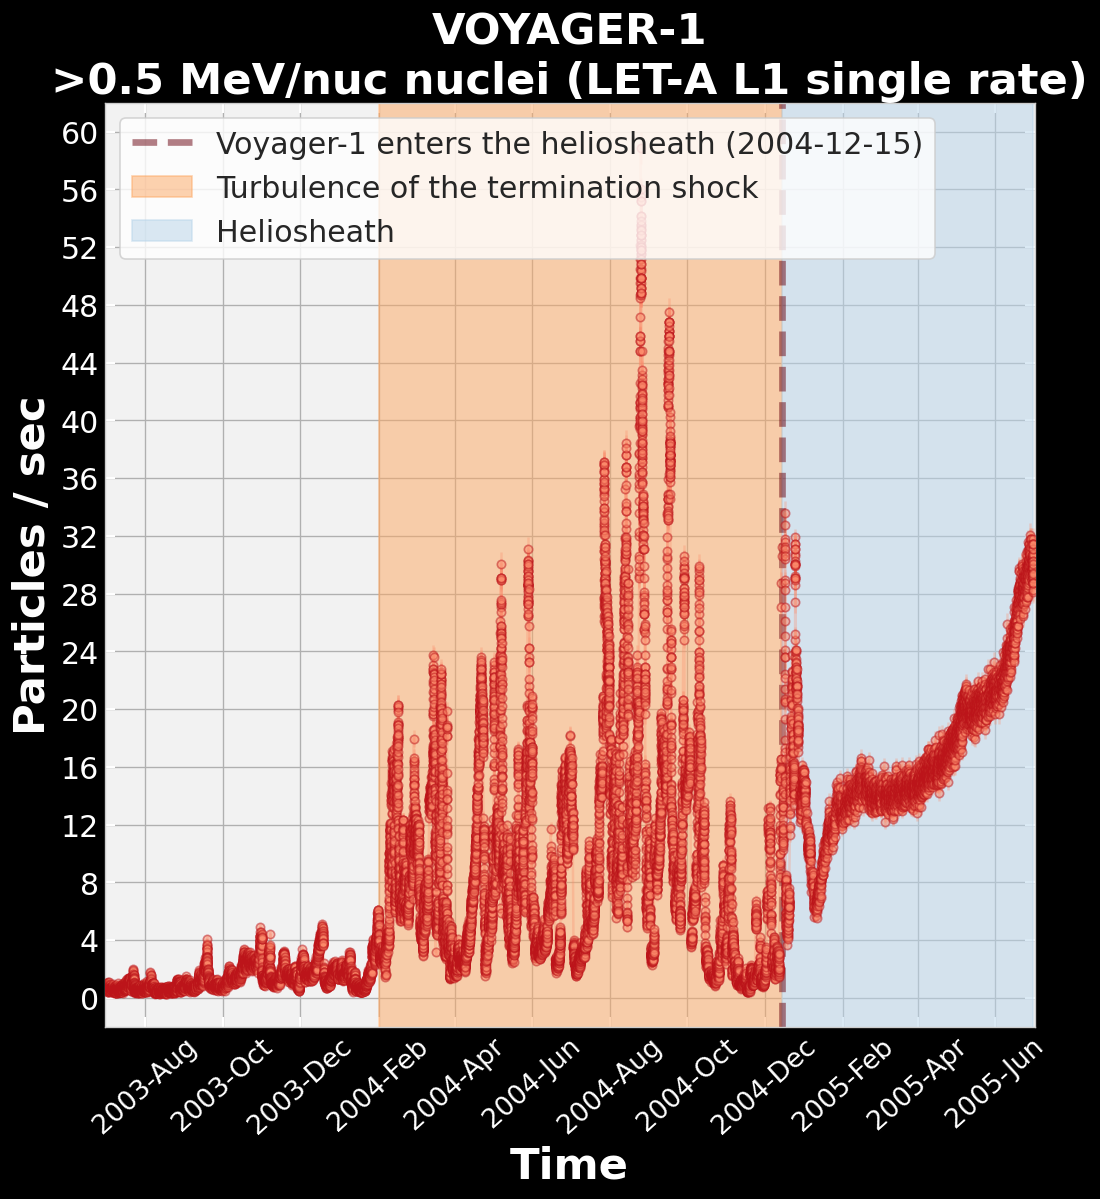

In [6]:
fig, axes = plt.subplots(figsize=(10, 10), dpi=120,
                         facecolor='black', subplot_kw={'facecolor' : '.95'})

axes.grid(True)

cmap = cm.Reds
x = data['Time']
y = data['LA1']
y_err = data['LA1_err']
axes.errorbar(x, y, yerr=y_err,
              color=cmap(0.4), fmt='', alpha=0.3)

sr = 5
axes.scatter(x, y, s=sr**2,
             color=cmap(0.4), ec=cmap(0.8, 0.2), alpha=0.5,
             zorder=3)

axes.axvline(x=TERMSHOCK, label='Voyager-1 enters the heliosheath (2004-12-15)',
             color=cmap(1.0), lw=4, ls='--', alpha=0.5, zorder=2)
termshock = pd.date_range(start="2004-02-01",end='2004-12-15').to_pydatetime().tolist()
axes.fill_between(termshock, -np.max(y)*2, np.max(y)*2,
                  label='Turbulence of the termination shock',
                  color=cm.Oranges(0.4), alpha=0.5)
termshock = pd.date_range(start="2004-12-15",end='2005-07-01').to_pydatetime().tolist()
axes.fill_between(termshock, -np.max(y)*2, np.max(y)*2,
                  label='Heliosheath',
                  color=cm.Blues(0.3), alpha=0.5)

axes.set_title('VOYAGER-1\n>0.5 MeV/nuc nuclei (LET-A L1 single rate)',
               fontsize=axistitlesize, fontweight='bold', color='white')
axes.set_xlabel('Time',
                fontsize=axislabelsize, fontweight='bold', color='white')
axes.set_ylabel('Particles / sec',
                fontsize=axislabelsize, fontweight='bold', color='white')

## X-ticks
# Major ticks every month
axes.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Tick parameters
axes.tick_params(axis='x', which='both',
                 colors='white', labelsize=16, rotation=42)
# Ax limits
datemin = np.datetime64('2003-07-01') - np.timedelta64(1, 'D')
datemax = np.datetime64('2005-07-01') + np.timedelta64(1, 'D')
axes.set_xlim(datemin, datemax)

## Y-ticks
# Major ticks every 0.1
loc = plticker.MultipleLocator(base=4) # this locator puts ticks at regular intervals
axes.yaxis.set_major_locator(loc)
# Tick parameters
axes.tick_params(axis='y', which='both',
                 colors='white', labelsize=18, rotation=0)
# Ax limits
axes.set_ylim(-2, 62)

axes.legend(loc='upper left', fontsize=axislegendsize-5)

plt.savefig('voyager_05mev_LET-A-L1-termshock.svg',
            format='png',
            dpi=150,
            bbox_inches='tight')

plt.show()

In [7]:
data = pd.read_csv(os.path.join(DATADIR, '20000701-20070631-voyager-1-let-a-L1-single-rates.txt'),
                   sep=' ', skiprows=2, parse_dates=[0],
                   names=['Time', 'LA1', 'LA1_err'])
data = data.drop(labels=data[data['LA1'] == 0].index)
data['Time'] = pd.to_datetime(data['Time'])

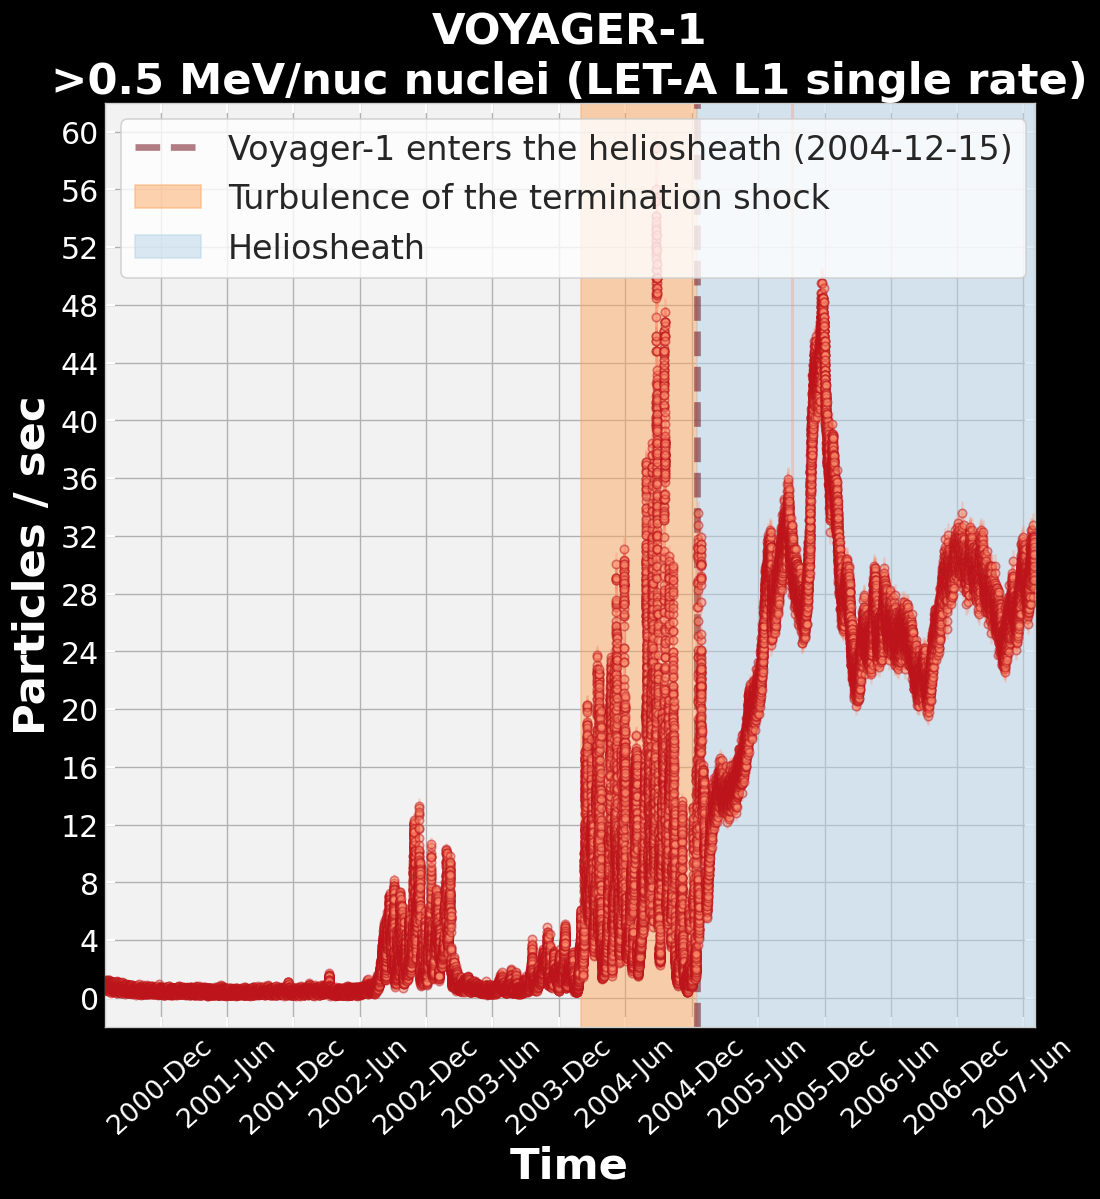

In [8]:
fig, axes = plt.subplots(figsize=(10, 10), dpi=120,
                         facecolor='black', subplot_kw={'facecolor' : '.95'})

axes.grid(True)

cmap = cm.Reds
x = data['Time']
y = data['LA1']
y_err = data['LA1_err']
axes.errorbar(x, y, yerr=y_err,
              color=cmap(0.4), fmt='', alpha=0.3)

sr = 5
axes.scatter(x, y, s=sr**2,
             color=cmap(0.4), ec=cmap(0.8, 0.2), alpha=0.5,
             zorder=3)

axes.axvline(x=TERMSHOCK, label='Voyager-1 enters the heliosheath (2004-12-15)',
             color=cmap(1.0), lw=4, ls='--', alpha=0.5, zorder=2)
termshock = pd.date_range(start="2004-02-01",end='2004-12-15').to_pydatetime().tolist()
axes.fill_between(termshock, -np.max(y)*2, np.max(y)*2,
                  label='Turbulence of the termination shock',
                  color=cm.Oranges(0.4), alpha=0.5)
termshock = pd.date_range(start="2004-12-15",end='2007-07-01').to_pydatetime().tolist()
axes.fill_between(termshock, -np.max(y)*2, np.max(y)*2,
                  label='Heliosheath',
                  color=cm.Blues(0.3), alpha=0.5)

axes.set_title('VOYAGER-1\n>0.5 MeV/nuc nuclei (LET-A L1 single rate)',
               fontsize=axistitlesize, fontweight='bold', color='white')
axes.set_xlabel('Time',
                fontsize=axislabelsize, fontweight='bold', color='white')
axes.set_ylabel('Particles / sec',
                fontsize=axislabelsize, fontweight='bold', color='white')

## X-ticks
# Major ticks every month
axes.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Tick parameters
axes.tick_params(axis='x', which='both',
                 colors='white', labelsize=16, rotation=42)
# Ax limits
datemin = np.datetime64('2000-07-01') - np.timedelta64(1, 'D')
datemax = np.datetime64('2007-07-01') + np.timedelta64(1, 'D')
axes.set_xlim(datemin, datemax)

## Y-ticks
# Major ticks every 0.1
loc = plticker.MultipleLocator(base=4) # this locator puts ticks at regular intervals
axes.yaxis.set_major_locator(loc)
# Tick parameters
axes.tick_params(axis='y', which='both',
                 colors='white', labelsize=18, rotation=0)
# Ax limits
axes.set_ylim(-2, 62)

axes.legend(loc='upper left', fontsize=axislegendsize-3)

plt.savefig('voyager_05mev_LET-A-L1-termshock_extended.svg',
            format='png',
            dpi=150,
            bbox_inches='tight')

plt.show()